In [61]:
import numpy as np
import tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD


In [65]:
## Setup global parameters
batch_size = 32
epochs = 2
data_augmentation = True
num_classes = 10 #Number of output classes in Cifar 10

In [62]:
#Load Cifar10 data
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [66]:
print("Dimension of data", x_train.shape)
input_shape = x_train[0].shape
print("Input Image shape: ", input_shape)
print("Looking the first data point", x_train[1])

Dimension of data (50000, 32, 32, 3)
Input Image shape:  (32, 32, 3)
Looking the first data point [[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


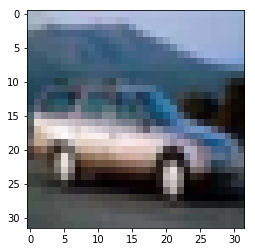

In [67]:
plt.imshow(x_train[4])
plt.show()

In [68]:
#Normalize input
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print(x_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [69]:
#Perform Mean normalization

x_train_mean = np.mean(x_train, axis=0)
x_test_mean = np.mean(x_test, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

In [70]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [71]:
def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    sgd = SGD(lr = 0.1, decay=1e-6, nesterov=True)

# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

cnn_n = base_model()
cnn_n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [72]:
cnn_n1 = base_model()
print(cnn_n1.summary())
cnn1 = cnn_n1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [57]:
"""
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import rmsprop
from keras.models import Sequential, Model



x = Flatten()(resnet50.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
predictions = Dense(10, activation = 'softmax')(x)

#create graph of your new model
model = Model(input = resnet50.input, output = predictions)

opt = rmsprop(lr=0.01, decay=1e-5)
print(model.layers[-5:])

for layer in model.layers[:-5]:
    layer.trainable = False

"""


"\nfrom keras.layers import Flatten, Dense, Dropout, BatchNormalization\nfrom keras.optimizers import rmsprop\nfrom keras.models import Sequential, Model\n\n\n\nx = Flatten()(resnet50.output)\nx = Dense(512, activation='relu')(x)\nx = Dropout(0.3)(x)\nx = BatchNormalization()(x)\npredictions = Dense(10, activation = 'softmax')(x)\n\n#create graph of your new model\nmodel = Model(input = resnet50.input, output = predictions)\n\nopt = rmsprop(lr=0.01, decay=1e-5)\nprint(model.layers[-5:])\n\nfor layer in model.layers[:-5]:\n    layer.trainable = False\n\n"

In [73]:
if not data_augmentation:
    print("No data augmentation.")
    cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,shuffle=True)
else:
    print("Using Data Augmentation...")
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=20,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.2,
        # set range for random zoom
        zoom_range=0.1,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
    datagen.fit(x_train)
    
    # Fit the model on the batches generated by datagen.flow().
    cnn_n.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),epochs=epochs,
                        validation_data=(x_test, y_test), shuffle=True)
    
    

Using Data Augmentation...
Epoch 1/2
1563/1563 [==============================] - 216s 138ms/step - loss: 1.8224 - acc: 0.3258 - val_loss: 1.4778 - val_acc: 0.4697
Epoch 2/2
1563/1563 [==============================] - 215s 138ms/step - loss: 1.5121 - acc: 0.4502 - val_loss: 1.2771 - val_acc: 0.5369


In [ ]:
#score = cnn_n.evaluate(x_test, y_test, batch_size=32)

In [ ]:
#score